In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

In [2]:
# open files
train_data = pd.read_csv("/kaggle/input/playground-series-s3e23/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s3e23/test.csv")

In [3]:
train_data.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [5]:
train_data.drop('id', axis=1, inplace=True)

In [6]:
train_data['defects'] = train_data['defects'].replace({True: 1, False: 0})

In [7]:
train_data.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,1.017630e+05,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,37.347160,5.492684,2.845022,3.498826,96.655995,538.280956,0.111634,13.681881,27.573007,2.085359e+04,...,22.802453,1.773945,3.979865,0.196604,11.896131,15.596671,57.628116,39.249698,9.839549,0.226644
std,54.600401,7.900855,4.631262,5.534541,171.147191,1270.791601,0.100096,14.121306,22.856742,1.905714e+05,...,38.541010,5.902412,6.382358,0.998906,6.749549,18.064261,104.537660,71.692309,14.412769,0.418663
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.560000,5.647300e+02,...,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000,0.000000
50%,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.360000,2.256230e+03,...,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000,0.000000
75%,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.340000,1.019324e+04,...,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,45.000000,11.000000,0.000000
max,3442.000000,404.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,1.684662e+07,...,2824.000000,344.000000,219.000000,43.000000,410.000000,1026.000000,5420.000000,3021.000000,503.000000,1.000000


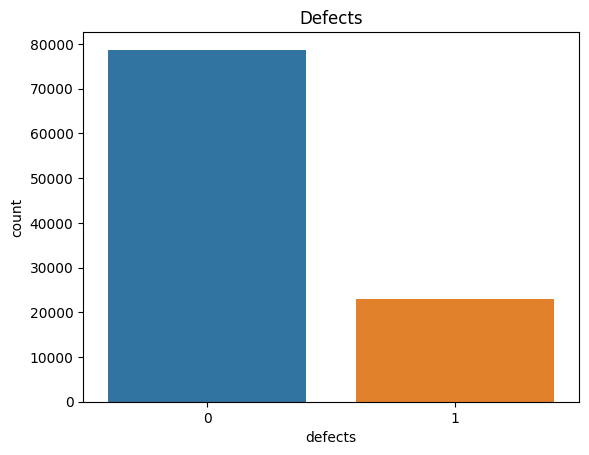

In [8]:
# see class balance
sns.countplot(data = train_data, x = 'defects')
plt.title('Defects');

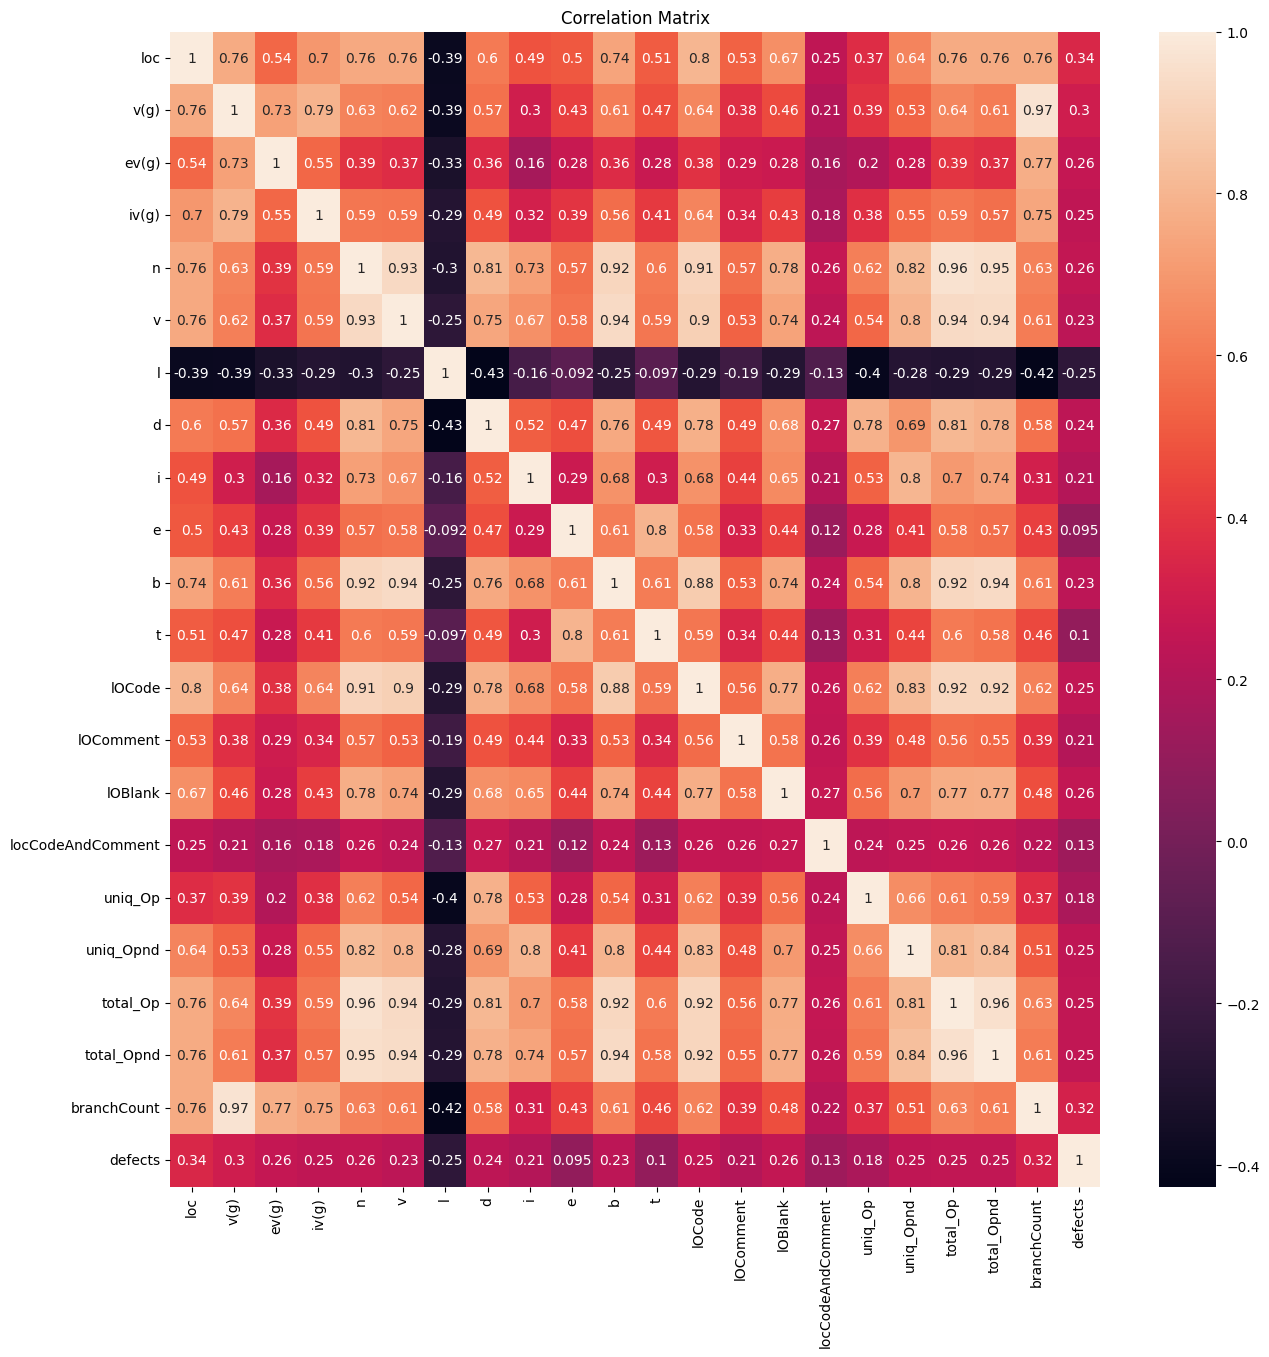

In [9]:
# Calculate the correlation matrix
corr_matrix = train_data.corr()

# Set the size of the figure
plt.figure(figsize=(15, 15))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [10]:
train_data.drop(['n','v','b', 'lOCode', 'total_Op', 'total_Opnd','branchCount'], axis=1, inplace=True )

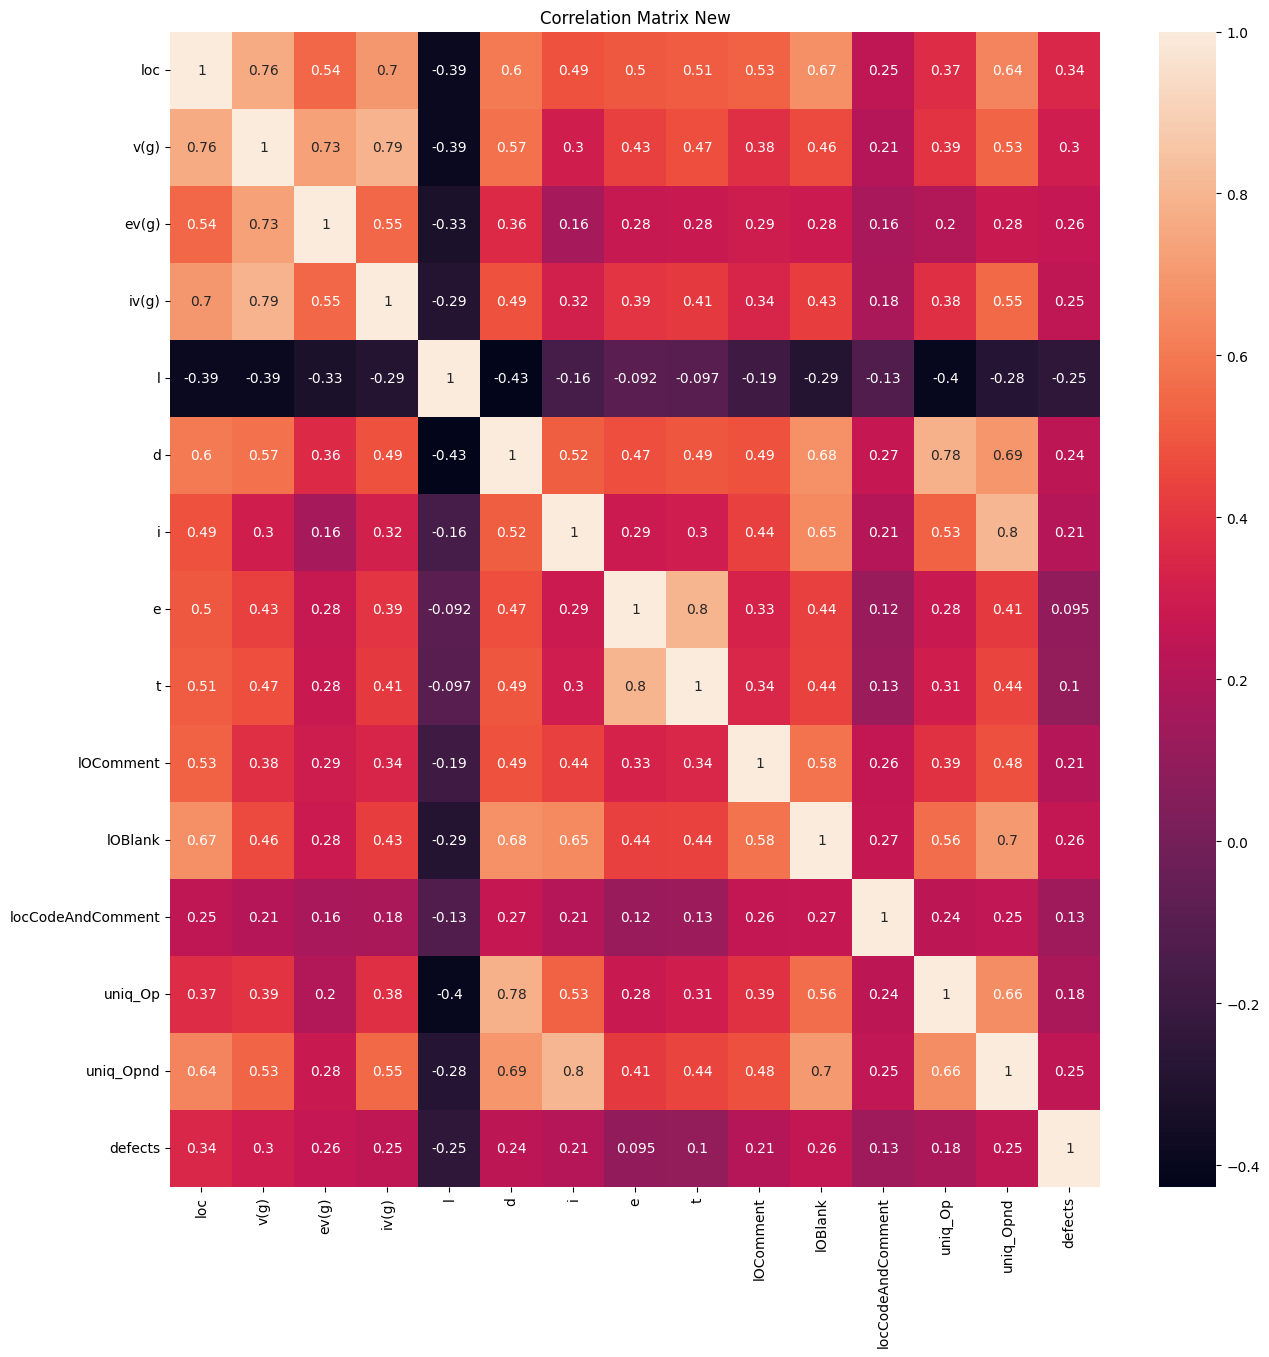

In [11]:
# Calculate the correlation matrix
corr_matrix = train_data.corr()

# Set the size of the figure
plt.figure(figsize=(15, 15))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix New')
plt.show()

In [12]:
features = train_data.drop('defects', axis=1)
target = train_data['defects']

In [13]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.3, random_state = 310)

In [14]:
features_train.shape

(71234, 14)

In [15]:
features_valid.shape

(30529, 14)

In [16]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train_scaled = scaler.transform(features_train)
features_valid_scaled = scaler.transform(features_valid)

In [25]:
import warnings
warnings.filterwarnings('ignore')

model = LogisticRegression(solver = 'saga', class_weight = 'balanced')
params = {'C':[0.001, 0.1, 1, 10], 'penalty':['l1', 'l2']}
grid_search = GridSearchCV(model, params, cv=5, scoring = 'f1')
grid_search.fit(features_train_scaled, target_train)
grid_search.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced', penalty='l1', solver='saga')

In [26]:
grid_search.best_score_

0.554718544425817

In [27]:
best_model = grid_search.best_estimator_
pred_valid = best_model.predict(features_valid_scaled)
roc_auc = roc_auc_score(target_valid, pred_valid)
print('ROC-AUC valid:', roc_auc)

ROC-AUC valid: 0.722447818082605


In [28]:
print(confusion_matrix(target_valid, pred_valid))

[[19224  4423]
 [ 2533  4349]]


In [29]:
print(classification_report(target_valid, pred_valid))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85     23647
           1       0.50      0.63      0.56      6882

    accuracy                           0.77     30529
   macro avg       0.69      0.72      0.70     30529
weighted avg       0.80      0.77      0.78     30529



In [22]:
features_test = test_data.drop(['id','n','v','b', 'lOCode', 'total_Op', 'total_Opnd','branchCount'], axis=1)

In [30]:
features_test_scaled = scaler.transform(features_test)

In [31]:
predictions = best_model.predict_proba(features_test_scaled)[:, 1]

output = pd.DataFrame({'id': test_data.id, 'defects': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
